
##  **Most Important Techniques for Regression **

### 🔹 **1. Correlation Analysis (Pearson)**
- **Why**: To detect **linear relationships** between independent variables and the target.
- **Use it to**: Remove irrelevant or redundant features early.

### 🔹 **2. Skewness**
- **Why**: Many regression models (especially linear ones) assume normally distributed features.
- **Use it to**: Apply **log/sqrt** transformations on skewed features.
- **Tool**: `df.skew()` in Pandas.

### 🔹 **3. P-Value (from Linear Regression Summary)**
- **Why**: Shows if a feature is **statistically significant**.
- **Use it to**: Drop features with **p > 0.05** in **OLS regression** (e.g., using `statsmodels`).

### 🔹 **4. Variance Inflation Factor (VIF)**
- **Why**: Detects **multicollinearity** (when features are too correlated with each other).
- **Use it to**: Drop or combine highly collinear features.
- **Threshold**: VIF > 5 or 10 is usually problematic.



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

warnings.filterwarnings('ignore')

In [4]:
df1= pd.read_csv("/content/drive/MyDrive/task/housepricePrediction/House Price India.csv")
df= pd.read_csv("/content/drive/MyDrive/task/housepricePrediction/House Price India.csv")

In [5]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [6]:
df.shape

(14619, 23)

In [7]:
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [9]:
df.drop(["id"],axis=1, inplace =True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.describe()

,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,...,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04
mean,42604.546412,3.379233,2.129557,2098.156851,1.509369e+04,1.502326,0.007661,0.232848,3.430399,7.682263,...,1970.929817,90.930228,122033.064300,52.792843,-114.403996,1996.641836,12754.003078,2.012244,64.951433,5.388063e+05
std,67.343747,0.938655,0.769955,928.218740,3.792089e+04,0.540241,0.087196,0.765651,0.664047,1.174917,...,29.491743,416.230218,19.081451,0.137525,0.141325,691.078387,26059.234785,0.817312,8.936129,3.672294e+05
min,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,42546.000000,3.000000,1.750000,1440.000000,5.010500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.500000,1.000000,57.000000,3.200000e+05
50%,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


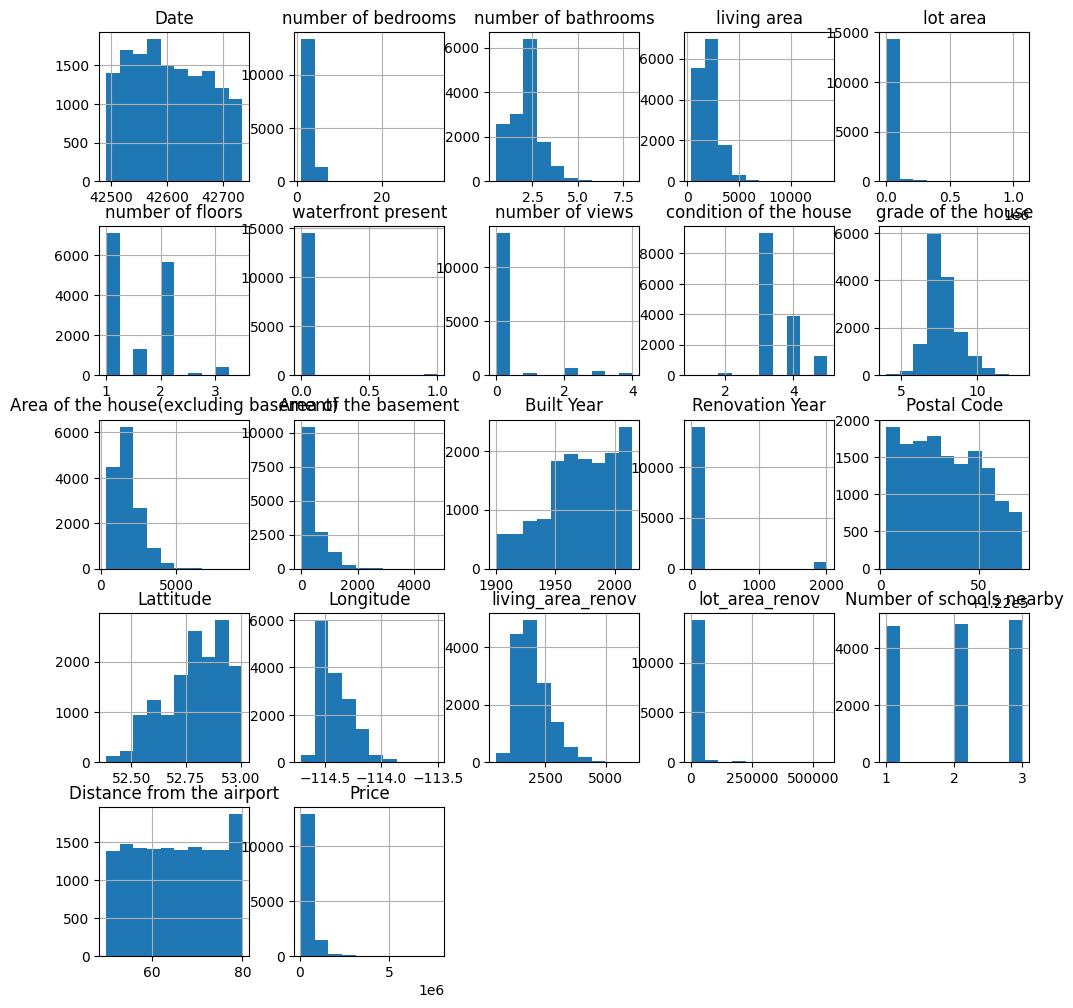

In [12]:
df.hist(figsize=(12,12))
plt.show()

<Axes: >

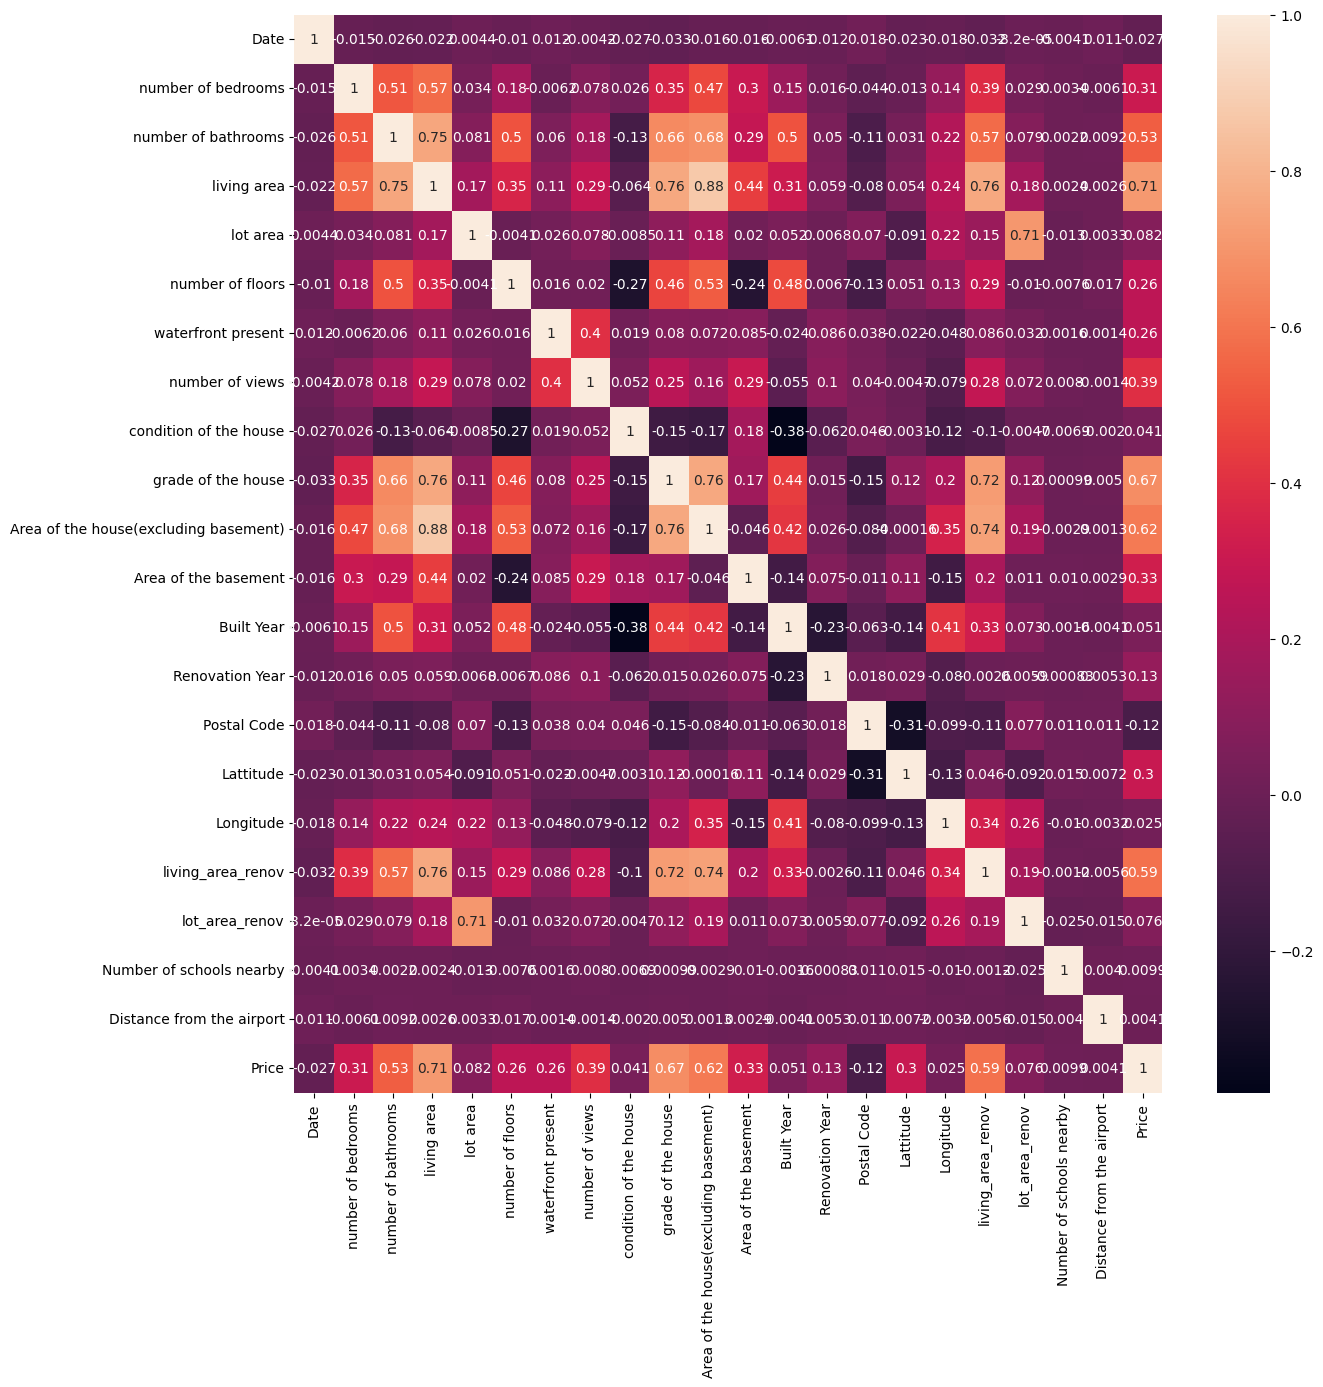

In [13]:
plt.figure(figsize = (14,14))
sns.heatmap(df.corr(), annot =True)



In [14]:
df.skew()

,0
Date,0.143766
number of bedrooms,2.663983
number of bathrooms,0.556748
living area,1.538749
lot area,10.154853
number of floors,0.586324
waterfront present,11.294277
number of views,3.410436
condition of the house,1.018148
grade of the house,0.777747


In [15]:
import numpy as np

for col in ["number of bedrooms","living area","lot area","waterfront present","number of views","condition of the house","Area of the house(excluding basement)","Area of the basement","Renovation Year","living_area_renov", "lot_area_renov"]:
    df[col] = np.log1p(df[col])  # log1p handles zero safely (log(1 + x))


In [16]:
df.skew()

,0
Date,0.143766
number of bedrooms,-0.293157
number of bathrooms,0.556748
living area,-0.030493
lot area,0.944375
number of floors,0.586324
waterfront present,11.294277
number of views,2.990879
condition of the house,0.635004
grade of the house,0.777747


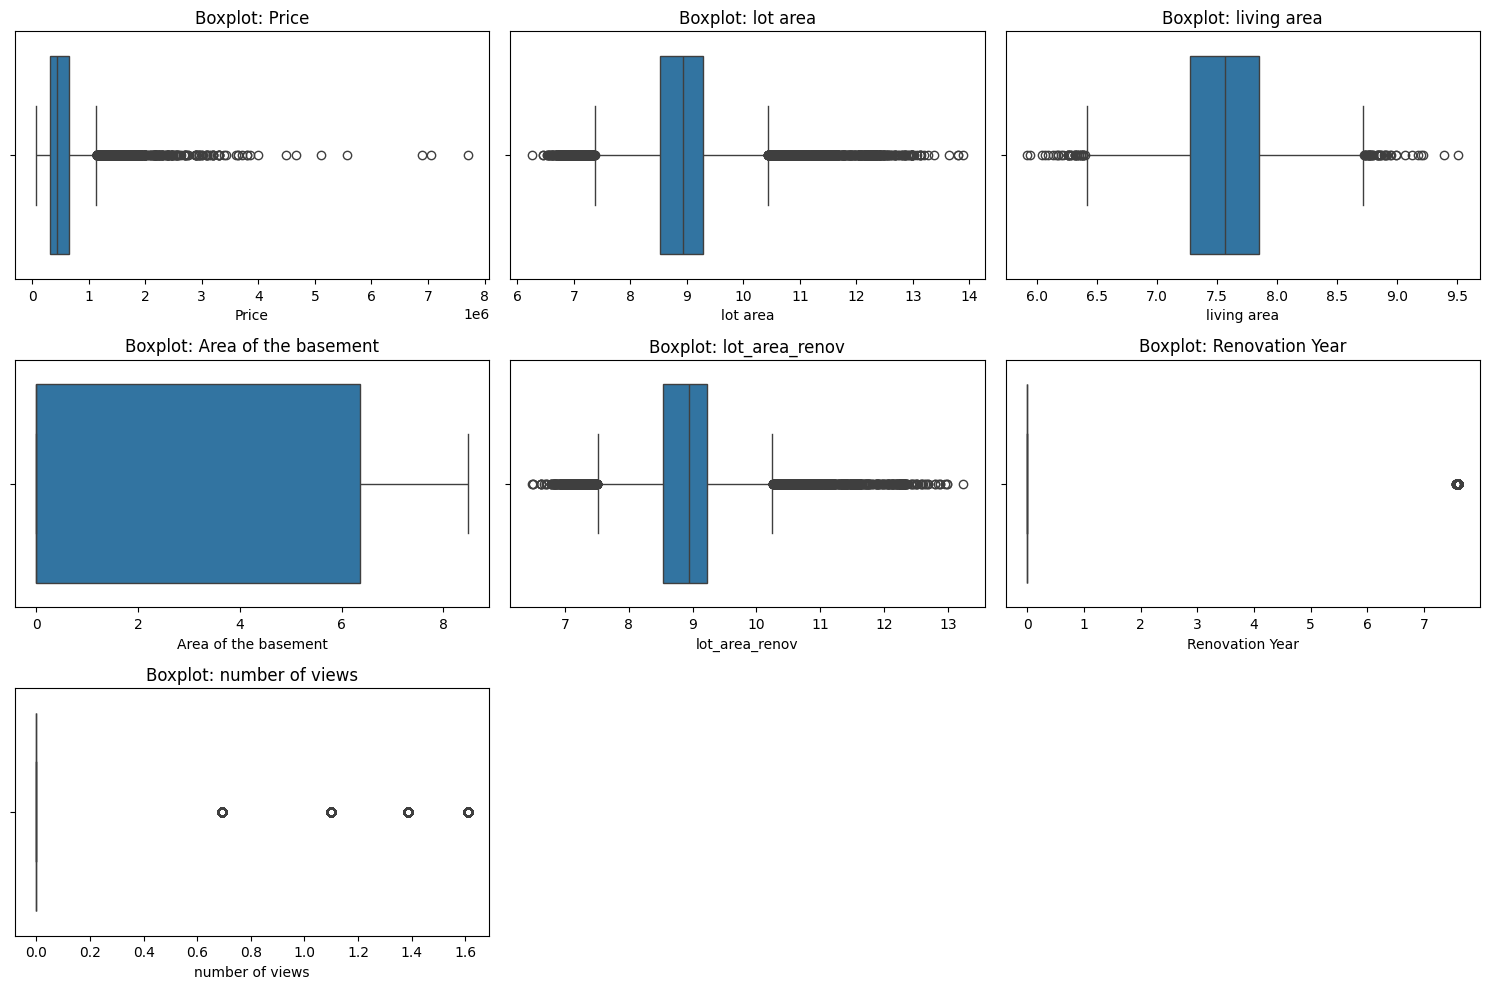

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of relevant columns to check for outliers
columns_to_check = [
    'Price', 'lot area', 'living area', 'Area of the basement',
    'lot_area_renov', 'Renovation Year', 'number of views'
]

# Boxplots to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()


In [18]:
# Function to detect and optionally remove outliers
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers")
    return outliers

# Check outliers in all selected columns
for col in columns_to_check:
    detect_outliers_iqr(df, col)


Price: 760 outliers
lot area: 1736 outliers
living area: 79 outliers
Area of the basement: 0 outliers
lot_area_renov: 1690 outliers
Renovation Year: 666 outliers
number of views: 1421 outliers


In [19]:
df.shape

(14619, 22)

VIF Value	Interpretation

1–5	Acceptable / low multicollinearity

5–10	Moderate — investigate further

" > 10	High — consider dropping/combining features"

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import statsmodels.api as sm

# Select only numerical columns (excluding the target variable)
features = df.drop(columns=['Price'])  # Replace 'Price' with your actual target
X = sm.add_constant(features)  # add constant for intercept

# Create DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df["Feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df.sort_values(by="VIF", ascending=False))


                                  Feature           VIF
0                                   const  4.919345e+07
4                             living area  2.715800e+01
11  Area of the house(excluding basement)  2.633339e+01
12                   Area of the basement  6.678207e+00
5                                lot area  5.557499e+00
19                         lot_area_renov  5.521583e+00
3                     number of bathrooms  3.273298e+00
10                     grade of the house  3.228080e+00
18                      living_area_renov  2.929230e+00
6                        number of floors  2.373651e+00
13                             Built Year  2.346066e+00
2                      number of bedrooms  1.885764e+00
17                              Longitude  1.634444e+00
8                         number of views  1.347191e+00
9                  condition of the house  1.256706e+00
16                              Lattitude  1.238090e+00
15                            Postal Code  1.171

In [21]:
def is_renovation_happend(text):
  if text == 0:
    return  0
  else:
    return 1


df["is_renovation_happend"] = df["Renovation Year"].apply(is_renovation_happend)

In [22]:
df["is_renovation_happend"] .value_counts()

,count
is_renovation_happend,
0,13953
1,666


In [23]:
# Prepare data
X = df.drop(columns=['Price'])  # Independent variables
y = df['Price']                 # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
#  Model 1: Random Forest
# -----------------------------
rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# -----------------------------
#  Model 2: XGBoost
# -----------------------------
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# -----------------------------
#  Evaluation Function
# -----------------------------
def evaluate(y_true, y_pred, model_name):
    print(f"\n {model_name} Evaluation:")
    print(f"MAE:  {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"MSE:  {mean_squared_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R²:   {r2_score(y_true, y_pred):.4f}")

# -----------------------------
#  Evaluate Both Models
# -----------------------------
evaluate(y_test, y_pred_rf, "Random Forest Regressor")
evaluate(y_test, y_pred_xgb, "XGBoost Regressor")



🔍 Random Forest Regressor Evaluation:
MAE:  70006.30
MSE:  17691191750.08
RMSE: 133008.24
R²:   0.8805

🔍 XGBoost Regressor Evaluation:
MAE:  67761.93
MSE:  13812680704.00
RMSE: 117527.36
R²:   0.9067
